### 1. Cogan SF, Ludwig KA, Welle CG, Takmakov P. Tissue damage thresholds during therapeutic electrical stimulation. J Neural Eng. 2016;13(2):21001. doi:10.1088/1741-2560/13/2/021001.

### shannon equation
###  log(D) = k - log(Q) 
### k = 1.85 
### charge density = D, charge per phase = Q 

### we are in the macro region according to the article (> 30 micron diamater) 

### diameter= 2.3 mm, so 0.23 cm - for strips

### depths 

Andrew says our spencer depths are 

1.12 mm diameter, 2.41 mm length 

### microwire

### macro/micro 
macro - 1.28 mm diameter, 1.57 length 

micro - 0.04 mm

### micro ECoG - 2009 U Pitt Wei Wang paper
diameter = 1.5 mm

### consider currents 1000-3000 uA 

### consider time per phase 100-1000 uS 

### tissue damage threshold of  30 $\mu C/cm^{2}$

In [ ]:
%qtconsole

In [1]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


#import seaborn as sns; sns.set()

from bokeh.charts import BoxPlot, show
from bokeh.io import push_notebook,show,output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure 
output_notebook()


/Users/djcald/Virtualenvs/sciPyagain/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


Loading BokehJS ...

In [22]:
# set up current ranges, pulse width ranges

pulse_width = np.arange(.1e-3,1e-3,0.00001)
log_pulse_width = np.log10(1e6*pulse_width)

current = np.arange(100,5000,10)
log_current = np.log10(current)

# make meshGrid of values to evaluate 
meshed_grid_x, meshed_grid_y = np.meshgrid(pulse_width,current)

meshed_grid_x

#meshed_grid_y

array([[ 0.0001 ,  0.00011,  0.00012, ...,  0.00097,  0.00098,  0.00099],
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00097,  0.00098,  0.00099],
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00097,  0.00098,  0.00099],
       ..., 
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00097,  0.00098,  0.00099],
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00097,  0.00098,  0.00099],
       [ 0.0001 ,  0.00011,  0.00012, ...,  0.00097,  0.00098,  0.00099]])

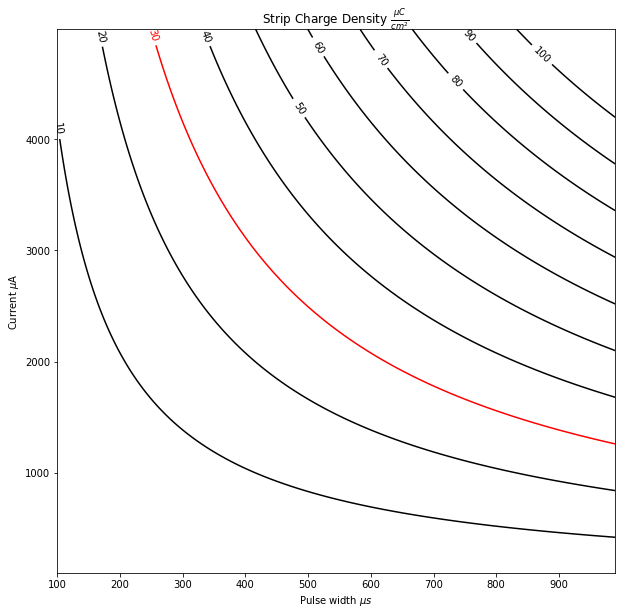

In [23]:
### strips
strip_r = 0.23/2
strip_area = np.pi*(strip_r**2)


charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/strip_area

log_charge_density = np.log10(charge_density)

#pal = sns.light_palette("navy", as_cmap=True)
a = plt.figure()
a.set_size_inches(10,10)
levels = np.arange(10,110,10)
h = plt.contour(1e6*pulse_width,current,charge_density,levels=levels,colors=('k','k','r','k','k','k','k','k','k','k'))
#cbar = plt.colorbar()
plt.title(r'Strip Charge Density $\frac{\mu C}{cm^2}$')
plt.xlabel('Pulse width $\mu s$')
plt.ylabel('Current $\mu$A')
#cbar.set_label(r'charge density $\frac{\mu C}{cm^2}$')

plt.clabel(h, inline=1,inline_spacing=5,fontsize=10,fmt='%1i')

plt.show()
#a = plt.gcf()
#a.set_size_inches(10,10)
#a.savefig('strip.png', dpi=600)


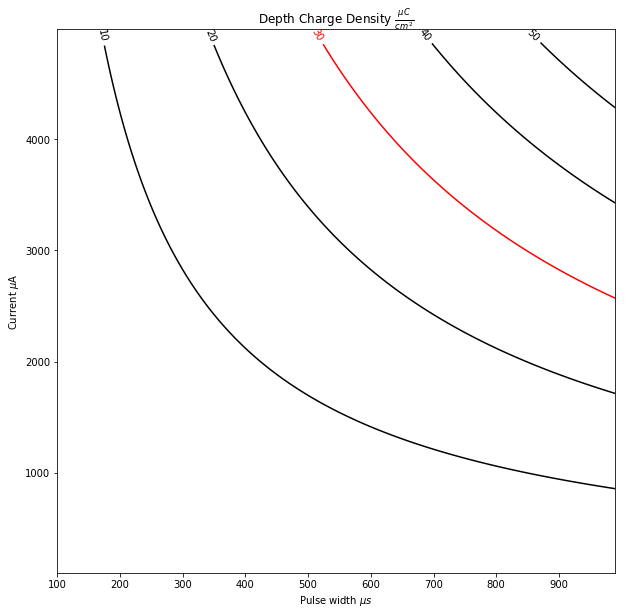

In [24]:
### depths  # distances in cm 
depth_r = 0.112/2
depth_h = 0.241
depth_area = 2*np.pi*depth_r*depth_h


charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/depth_area

log_charge_density = np.log10(charge_density)

#pal = sns.light_palette("navy", as_cmap=True)
a = plt.figure()
a.set_size_inches(10,10)
levels = np.arange(10,110,10)
h = plt.contour(1e6*pulse_width,current,charge_density,levels=levels,colors=('k','k','r','k','k','k','k','k','k','k'))
#cbar = plt.colorbar()
plt.title(r'Depth Charge Density $\frac{\mu C}{cm^2}$')
plt.xlabel('Pulse width $\mu s$')
plt.ylabel('Current $\mu$A')
#cbar.set_label(r'charge density $\frac{\mu C}{cm^2}$')

plt.clabel(h, inline=1,inline_spacing=5,fontsize=10,fmt='%1i')

plt.show()
#a = plt.gcf()
#a.set_size_inches(10,10)
#a.savefig('depth_241_len.png', dpi=600)


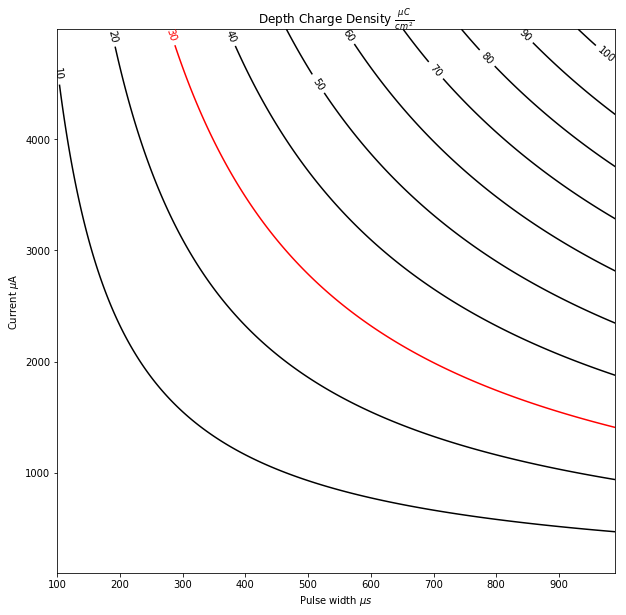

In [25]:
### depths  # distances in cm 
depth_r = 0.112/2
depth_h = 0.132
depth_area_small = 2*np.pi*depth_r*depth_h


charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/depth_area_small

log_charge_density = np.log10(charge_density)

#pal = sns.light_palette("navy", as_cmap=True)
a = plt.figure()
a.set_size_inches(10,10)
levels = np.arange(10,110,10)
h = plt.contour(1e6*pulse_width,current,charge_density,levels=levels,colors=('k','k','r','k','k','k','k','k','k','k'))
#cbar = plt.colorbar()
plt.title(r'Depth Charge Density $\frac{\mu C}{cm^2}$')
plt.xlabel('Pulse width $\mu s$')
plt.ylabel('Current $\mu$A')
#cbar.set_label(r'charge density $\frac{\mu C}{cm^2}$')

plt.clabel(h, inline=1,inline_spacing=5,fontsize=10,fmt='%1i')

plt.show()
#a = plt.gcf()
#a.set_size_inches(10,10)
#a.savefig('depth.png', dpi=600)


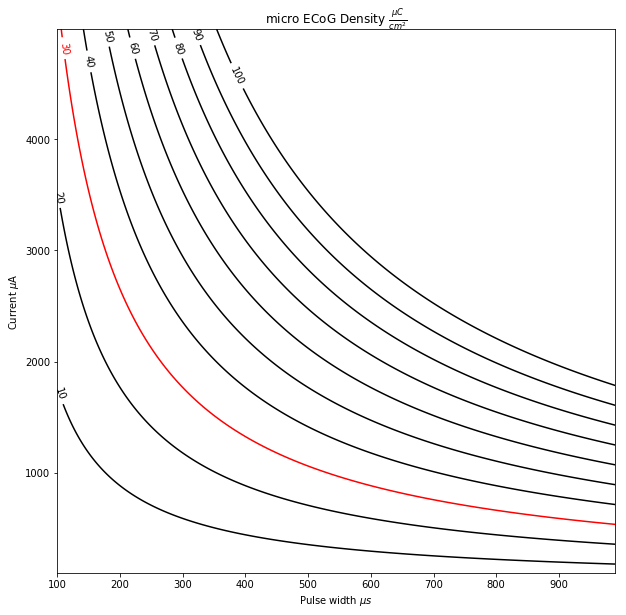

In [28]:
### micro ecog
micro_r = 0.15/2
micro_area = np.pi*(micro_r**2)


charge_per_phase= meshed_grid_x*meshed_grid_y

log_charge_per_phase = np.log10(charge_per_phase)

# look at charge/cm^2

# charge density

charge_density = charge_per_phase/micro_area

log_charge_density = np.log10(charge_density)

#pal = sns.light_palette("navy", as_cmap=True)
a = plt.figure()
a.set_size_inches(10,10)
levels = np.arange(10,110,10)
h = plt.contour(1e6*pulse_width,current,charge_density,levels=levels,colors=('k','k','r','k','k','k','k','k','k','k'))
#cbar = plt.colorbar()
plt.title(r'micro ECoG Density $\frac{\mu C}{cm^2}$')
plt.xlabel('Pulse width $\mu s$')
plt.ylabel('Current $\mu$A')
#cbar.set_label(r'charge density $\frac{\mu C}{cm^2}$')

plt.clabel(h, inline=1,inline_spacing=5,fontsize=10,fmt='%1i')

plt.show()
#a = plt.gcf()
#a.set_size_inches(10,10)
#a.savefig('micro_ecog.png', dpi=600)

In [27]:
micro_area

0.017671458676442587